In [ ]:
#Importing all the required libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

#Checking the availability of cuda enabled device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#hyperparameters

input_size = 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


# Hyperparameters
input_size = 28 * 28   # 784 for MNIST
hidden_size = 100      # Example hidden size
num_classes = 10       # 10 classes for MNIST
learning_rate = 0.001
num_epochs = 5

In [4]:
#MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset = train_dataset, shuffle = True, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, shuffle = False, batch_size = batch_size)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 3.87MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 108kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 973kB/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


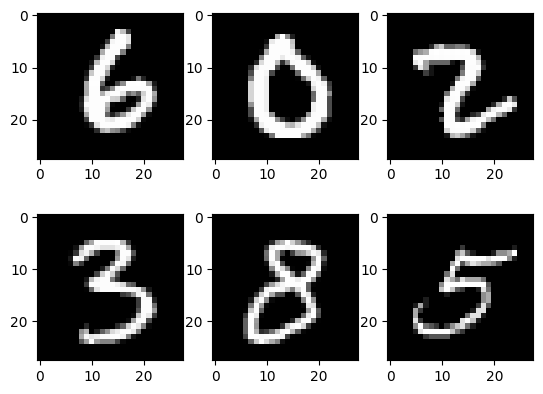

In [5]:
#Plotting a sample of digits from the training dataset
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

In [15]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.L1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.L2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.L1(x)
        out = self.relu(out)
        out = self.L2(out)
        return out



# Initialize model
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28)  # Flatten 28x28 images to 784
        labels = labels

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress (optional)
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.4367
Epoch [1/2], Step [200/600], Loss: 0.2591
Epoch [1/2], Step [300/600], Loss: 0.3143
Epoch [1/2], Step [400/600], Loss: 0.1484
Epoch [1/2], Step [500/600], Loss: 0.2594
Epoch [1/2], Step [600/600], Loss: 0.4354
Epoch [2/2], Step [100/600], Loss: 0.2514
Epoch [2/2], Step [200/600], Loss: 0.1453
Epoch [2/2], Step [300/600], Loss: 0.1195
Epoch [2/2], Step [400/600], Loss: 0.1239
Epoch [2/2], Step [500/600], Loss: 0.2151
Epoch [2/2], Step [600/600], Loss: 0.1630


In [16]:
#Computing the accuracy
correct = 0
total = 0

#Get the predicted class labels 
_, predicted = torch.max(outputs.data, 1)

#Get the number of correct predictions 
correct += (predicted == labels).sum().item()

#The total number of samples
total += labels.size(0)

#Computing the accuracy
accuracy = correct / total * 100

In [17]:
print(f"The accuracy of the model is {accuracy}")

The accuracy of the model is 95.0
